<a href="https://colab.research.google.com/github/levi-wj/bike_case_study/blob/main/notebooks/starter_bikes_Josh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
bikes.head()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [2]:
bikes.describe()

,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
count,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000,112475.000000
mean,11.501098,90.434612,249.193625,15.376487,14.659325,0.636624,13.100614,1.405441,2.495799,0.030300,0.684312
std,6.921864,128.655621,258.267544,9.749467,11.428324,0.190328,7.857600,0.683450,1.101152,0.171412,0.464791
min,0.000000,0.000000,0.000000,-14.700000,-24.000000,0.088900,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,7.000000,48.000000,7.600000,5.400000,0.484100,7.700000,1.000000,2.000000,0.000000,0.000000
50%,12.000000,36.000000,180.000000,16.000000,16.000000,0.640900,12.200000,1.000000,2.000000,0.000000,1.000000
75%,18.000000,122.000000,360.000000,23.500000,23.500000,0.798800,17.500000,2.000000,3.000000,0.000000,1.000000
max,23.000000,1244.000000,1702.000000,40.500000,49.600000,1.000000,69.800000,4.000000,4.000000,1.000000,1.000000


In [3]:
# Import the libraries we need
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Commonly used modules
import numpy as np

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
# import seaborn as sns
# import cv2
# import IPython
# from six.moves import urllib

# print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# one hot encode dteday

bikes['dteday'] = pd.to_datetime(bikes['dteday'])
bikes['year'] = bikes['dteday'].dt.year
bikes['month'] = bikes['dteday'].dt.month
bikes['day'] = bikes['dteday'].dt.day

bikes.day


,day
0,1
1,1
2,1
3,1
4,1
...,...
112470,31
112471,31
112472,31
112473,31


In [5]:
bikes['total'] = bikes.casual + bikes.registered
bikes

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday,year,month,day,total
0,2011-01-01,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0,2011,1,1,16
1,2011-01-01,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0,2011,1,1,38
2,2011-01-01,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0,2011,1,1,31
3,2011-01-01,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0,2011,1,1,12
4,2011-01-01,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0,2011,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,1,2023,10,31,835
112471,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,1,2023,10,31,621
112472,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,1,2023,10,31,578
112473,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,1,2023,10,31,363


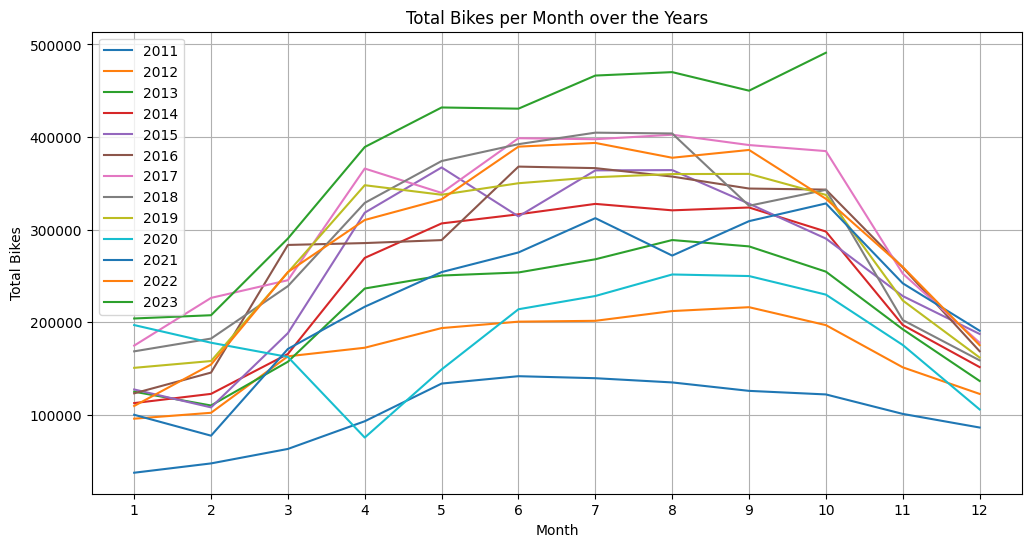

In [6]:
# prompt: make a graph with total bikes over the months and years

# Group the data by year and month, and sum the 'cnt' column
bikes_by_month = bikes.groupby(['year', 'month'])['total'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for year in bikes_by_month['year'].unique():
    year_data = bikes_by_month[bikes_by_month['year'] == year]
    plt.plot(year_data['month'], year_data['total'], label=str(year))

plt.xlabel('Month')
plt.ylabel('Total Bikes')
plt.title('Total Bikes per Month over the Years')
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()

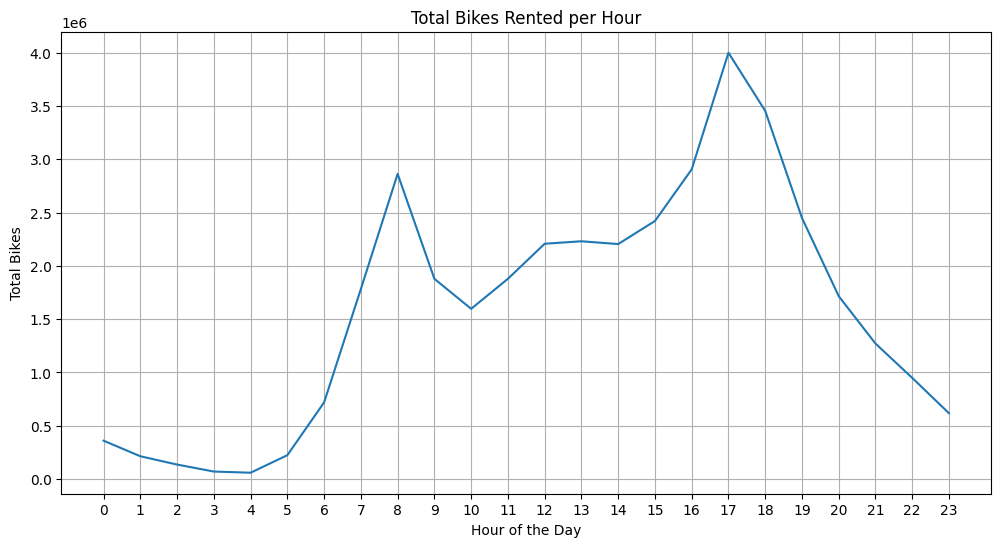

In [7]:
# prompt: graph showing most popular times to use bikes

import matplotlib.pyplot as plt

# Group the data by hour and sum the 'total' column
bikes_by_hour = bikes.groupby('hr')['total'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(bikes_by_hour['hr'], bikes_by_hour['total'])

plt.xlabel('Hour of the Day')
plt.ylabel('Total Bikes')
plt.title('Total Bikes Rented per Hour')
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

In [8]:
holiday = bikes.groupby(['holiday'])['total'].sum().reset_index()

holiday

,holiday,total
0,0,37236294
1,1,963392


In [9]:
working_day = bikes.groupby(['workingday'])['total'].sum().reset_index()

working_day

,workingday,total
0,0,11795004
1,1,26404682


In [10]:
seasons = bikes.groupby(['season'])['total'].sum().reset_index()

seasons

,season,total
0,1,5437061
1,2,11002273
2,3,12815073
3,4,8945279


In [11]:
weather = bikes.groupby(['weathersit'])['total'].sum().reset_index()

weather

,weathersit,total
0,1,29909060
1,2,6379083
2,3,1847005
3,4,64538


In [12]:
month_count = bikes.groupby(['month'])['total'].sum().reset_index()

month_count

,month,total
0,1,1726630
1,2,1820388
2,3,2637869
3,4,3410184
4,5,3760097
5,6,4046091
6,7,4227416
7,8,4216242
8,9,4093147
9,10,3953082


In [13]:
X = bikes.drop(['casual', 'registered', 'total', 'dteday', 'year', 'month', 'day'], axis=1)
y = bikes.total

X

,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,0.0,3.0,3.0,0.7957,0.8,1,1,0,0
1,1.0,1.7,1.7,0.8272,0.8,1,1,0,0
2,2.0,1.9,1.9,0.8157,1.1,1,1,0,0
3,3.0,2.5,2.5,0.7831,0.8,1,1,0,0
4,4.0,2.0,2.0,0.8075,1.1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
112470,19.0,10.2,10.2,0.4516,8.4,2,4,0,1
112471,20.0,8.9,7.5,0.5268,9.3,1,4,0,1
112472,21.0,7.7,6.4,0.5756,7.8,1,4,0,1
112473,22.0,8.0,8.0,0.5604,0.0,1,4,0,1


In [14]:
dteday_encoded = pd.get_dummies(bikes[['year', 'month', 'day']], columns=['year', 'month', 'day'])
bikes = pd.concat([bikes, dteday_encoded], axis=1)
bikes = bikes.drop(['dteday', 'year', 'month', 'day'], axis = 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
y_train

,total
22023,558
30281,337
83263,613
63147,289
18592,158
...,...
76820,100
110268,51
103694,18
860,67


In [17]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [18]:
# MODEL 1 - R^2 = 0.839

# model = Sequential()
# model.add(Dense(256, input_dim=len(X_train[0]), activation='relu'))
# model.add(Dropout(.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(256, activation='relu'))

# model.add(Dense(1, activation='relu'))

model = Sequential()
model.add(Dense(128, input_dim=len(X_train[0]), activation='relu'))
model.add(Dropout(.5))
Dense(64, activation='relu'),
Dense(32, activation='relu'),
Dense(1)

model.add(Dense(1, activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
opt = keras.optimizers.Adam()
model.compile(loss="mean_squared_error", optimizer=opt, metrics=['mse'])

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=30)

history = model.fit(X_train, y_train, epochs=2000, validation_split=.35, batch_size=20, callbacks=[early_stop],shuffle=False)
# history = model.fit(train_features, train_labels, epochs=2000, verbose=0, validation_split = .2, batch_size=tester2,
#                     callbacks=[early_stop, PrintDot()])

hist = pd.DataFrame(history.history)

Epoch 1/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 160312.6406 - mse: 160312.6406 - val_loss: 86935.6328 - val_mse: 86935.6328
Epoch 2/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 87648.8516 - mse: 87648.8516 - val_loss: 80137.3594 - val_mse: 80137.3594
Epoch 3/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 83096.4609 - mse: 83096.4609 - val_loss: 77625.4922 - val_mse: 77625.4922
Epoch 4/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 80696.2891 - mse: 80696.2891 - val_loss: 75146.7422 - val_mse: 75146.7422
Epoch 5/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 78074.2188 - mse: 78074.2188 - val_loss: 72393.4531 - val_mse: 72393.4531
Epoch 6/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 75143.5234 - mse: 75143.5234 - val_loss: 69475.3125 - val_mse: 69475.3125
Epoch 7/2000
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 72844.9766 - mse: 72844.9766 - val_loss: 66659.3516 - val_mse: 66659.3516
Epoch 8/2000
2925/2925 ━━━━

In [ ]:
hist = hist.reset_index()
hist

In [ ]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error ')
    plt.plot(hist['index'], hist['mse'], label='Train Error')
    plt.plot(hist['index'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    # plt.ylim([0,50])

plot_history()

In [ ]:
predictions = np.round(model.predict(X_test),1)

In [ ]:
predictions

In [ ]:
result = mean_squared_error(y_test, predictions, squared=False)
result

In [ ]:
r2 = r2_score(y_test,predictions)
r2